# Lasso & Ridge Regularization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv(r"C:\Users\arman\Desktop\housing.data.csv")

In [43]:
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [45]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [46]:
data["RM"].fillna(data["RM"].mean(), inplace=True)

C:\Users\arman\AppData\Local\Temp\ipykernel_10792\578861211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["RM"].fillna(data["RM"].mean(), inplace=True)


In [47]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [48]:
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


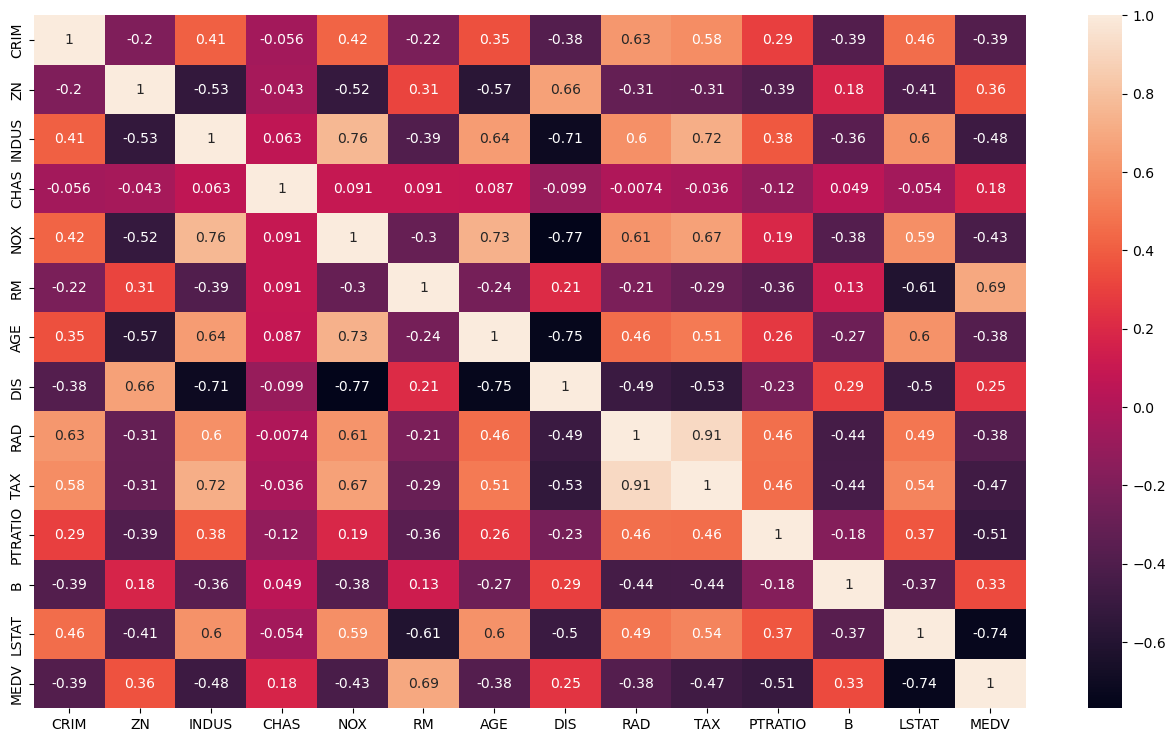

In [49]:
plt.figure(figsize=(16,9))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [50]:
x = data.iloc[:,:-1]
y = data["MEDV"]

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss = StandardScaler()
ss.fit_transform(x)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [53]:
dataset = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.412524,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.192808,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282828,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
lr.score(x_test,y_test)*100

66.67797776302082

In [107]:
print("MSE = ",mean_squared_error(y_test, lr.predict(x_test)))
print("MAE = ",mean_absolute_error(y_test, lr.predict(x_test)))
print("RMSE = ",np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

MSE =  24.436299531900904
MAE =  3.215085030381782
RMSE =  4.943308561267535


In [70]:
lr.coef_

array([-1.13134011e-01,  3.03177578e-02,  3.90940112e-02,  2.78385101e+00,
       -1.72314250e+01,  4.44822406e+00, -6.04499514e-03, -1.45545234e+00,
        2.59265877e-01, -1.04711390e-02, -9.10190157e-01,  1.23540447e-02,
       -5.09654681e-01])

In [71]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

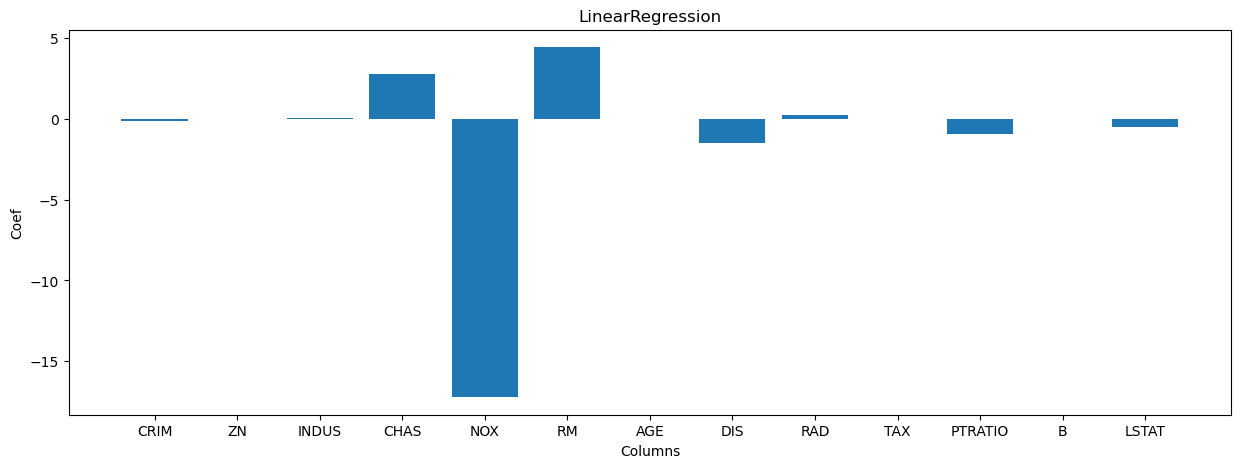

In [75]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

# Lasso (L1)

In [91]:
la = Lasso(alpha=0.5)

In [92]:
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [93]:
la.score(x_test,y_test)*100

66.67517687870341

In [108]:
print("MSE = ",mean_squared_error(y_test, la.predict(x_test)))
print("MAE = ",mean_absolute_error(y_test, la.predict(x_test)))
print("RMSE = ",np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

MSE =  24.43835352633281
MAE =  3.167479445890625
RMSE =  4.943516311931499


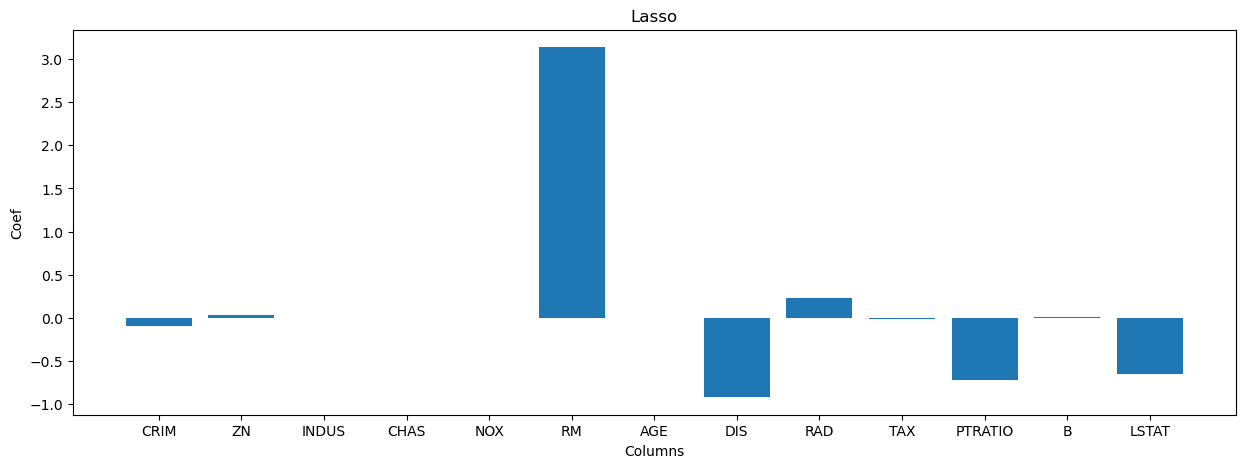

In [94]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

# Ridge (L2)

In [98]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

66.19458794986414

In [109]:
print("MSE = ",mean_squared_error(y_test, ri.predict(x_test)))
print("MAE = ",mean_absolute_error(y_test, ri.predict(x_test)))
print("RMSE = ",np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

MSE =  24.79078756930032
MAE =  3.147538801615166
RMSE =  4.979034802981429


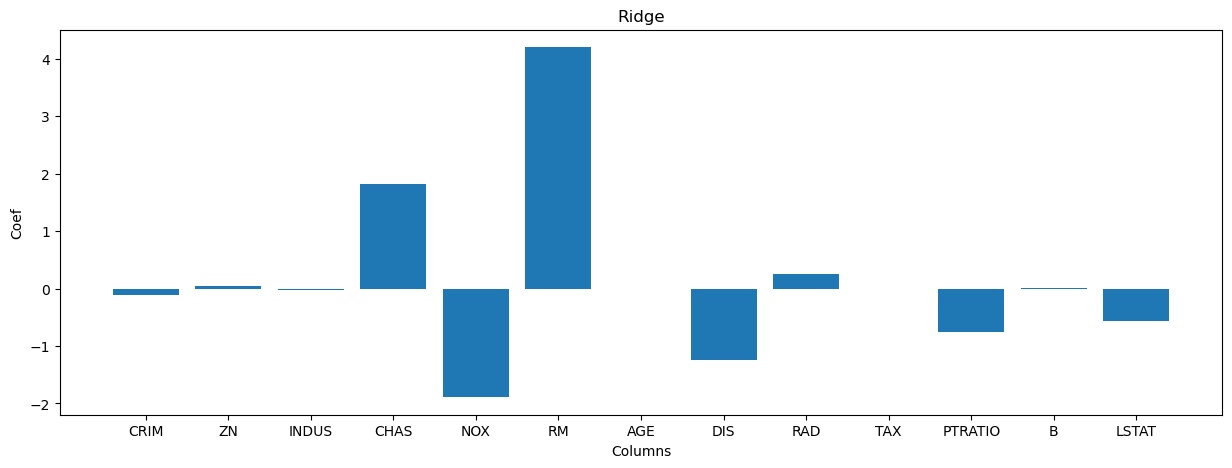

In [99]:
plt.figure(figsize=(15,5))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

# Comparison

In [113]:
df = pd.DataFrame({"columns_name":x.columns, "LinearRegressioon":lr.coef_, "Lasso":la.coef_, "Ridge":ri.coef_})
df

,columns_name,LinearRegressioon,Lasso,Ridge
0,CRIM,-0.113134,-0.093050,-0.107198
1,ZN,0.030318,0.032811,0.035756
2,INDUS,0.039094,-0.000000,-0.027627
3,CHAS,2.783851,0.000000,1.812680
4,NOX,-17.231425,-0.000000,-1.892406
5,RM,4.448224,3.137617,4.202490
6,AGE,-0.006045,0.000000,-0.015109
7,DIS,-1.455452,-0.920393,-1.239379
8,RAD,0.259266,0.234548,0.245057
9,TAX,-0.010471,-0.012937,-0.012582
